# 2D Fourier Transform for image analysis
written by Dirk Colbry
This example shows how to make a FFT transform of 2D images.  

In [1]:
#Pick a temporary filename (Currently only works for jpg images)
filename="image.jpg"

#Pick a URL with the image of interest.
URL="https://upload.wikimedia.org/wikipedia/commons/a/a2/MSU_Beaumont_Tower_1.jpg"
#URL="http://msutoday.msu.edu/_/img/assets/2013/sparty-in-stadium.jpg"
#URL="http://img.autobytel.com/car-reviews/autobytel/11694-good-looking-sports-cars/2016-Ford-Mustang-GT-burnout-red-tire-smoke.jpg"
#URL="http://broadmuseum.msu.edu/sites/default/files/20121106KAS9719_0.jpg"
#URL="https://upload.wikimedia.org/wikipedia/commons/0/03/MSU_Spartan_Stadium_Facade.jpg"

In [2]:
#Download the image
from urllib.request import urlretrieve
urlretrieve(URL,filename)

('image.jpg', <http.client.HTTPMessage at 0x7f778c9eaba8>)

PIL.JpegImagePlugin.JpegImageFile

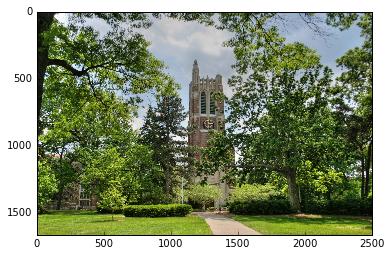

In [3]:
#Read and display the image
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(filename)
plt.imshow(im)
type(im)

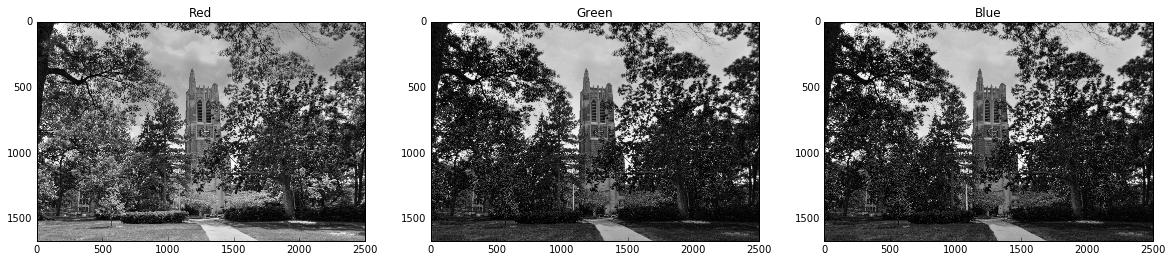

In [4]:
#show the read/green/blue channels of the image
import numpy as np
plt.figure(figsize=(20,10))
pix = np.array(im)
#plt.imshow(pix)
plt.subplot(1,3,1)
plt.imshow(pix[:,:,0], cmap=plt.cm.gray)
plt.title("Red")
plt.grid('off')
plt.subplot(1,3,2)
plt.imshow(pix[:,:,2], cmap=plt.cm.gray)
plt.title("Green")
plt.grid('off')
plt.subplot(1,3,3)
plt.imshow(pix[:,:,2], cmap=plt.cm.gray)
plt.title("Blue")
plt.grid('off')
#pix.shape



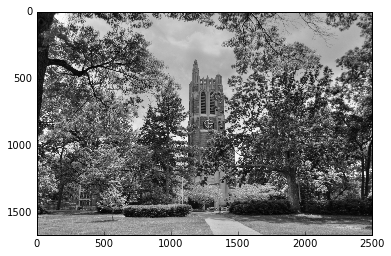

In [5]:
#Convert to a grayscale image
#Oddly, I could not find a rgb2gray function insize of numpy or PIL. 
#I did find it in skimage  (scikit image)
#I could also have just written it (it's a simple function)
from skimage import color
gray = color.rgb2gray(pix);
plt.imshow(gray, cmap=plt.cm.gray)

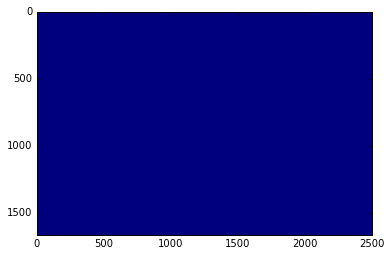

In [7]:
#Calculate the 2D FFT 
Fs = np.fft.fft2(gray)

#(Hard to visualize -- scaling is all off)
plt.imshow(np.abs(Fs))

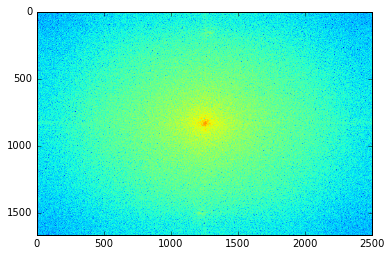

In [8]:
#Make it easier to visualize the FFT

#Shifts highest frequencies to center instead of corners.
F2 = np.fft.fftshift( Fs ) 

#Makes the Fourier space easier to see.
psd2D = np.abs( F2 )**2 

#Display the results
plt.imshow( np.log10( psd2D ))

&#169; Copyright 2016,  Michigan State University Board of Trustees